In [2]:
#Add all imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
# Load the housing dataset
housing = pd.read_csv('../datasets/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


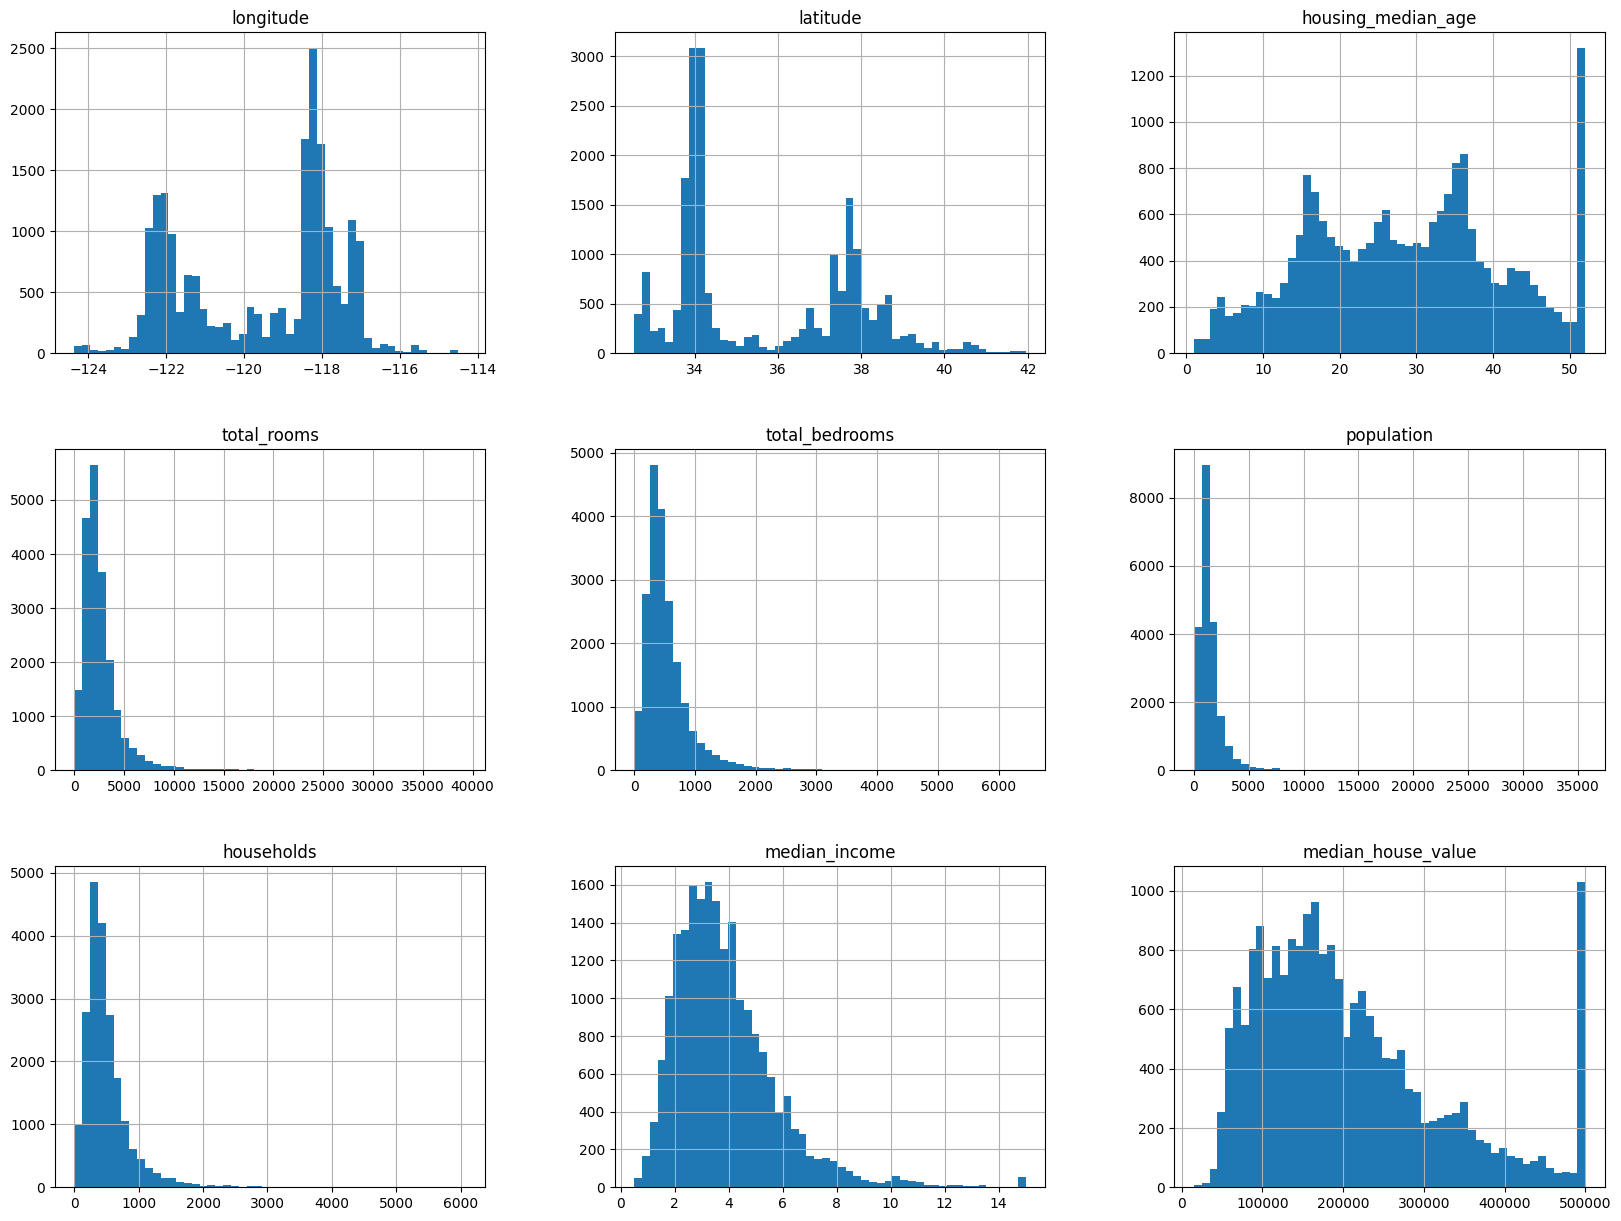

In [5]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Income Categorization

This code creates income categories and visualizes their distribution:

1. **Creates income categories**: `pd.cut()` divides the continuous `median_income` values into 5 discrete bins based on the specified boundaries (0-1.5, 1.5-3.0, 3.0-4.5, 4.5-6.0, 6.0+), and labels them as 1, 2, 3, 4, 5. This is useful for stratified sampling—grouping properties by income level.

2. **Visualizes the distribution**: `housing["income_cat"].hist()` plots a histogram showing how many properties fall into each income category, helping you see if the data is balanced across these groups.

This is typically used before splitting data into train/test sets to ensure both sets have similar income distributions.

<Axes: >

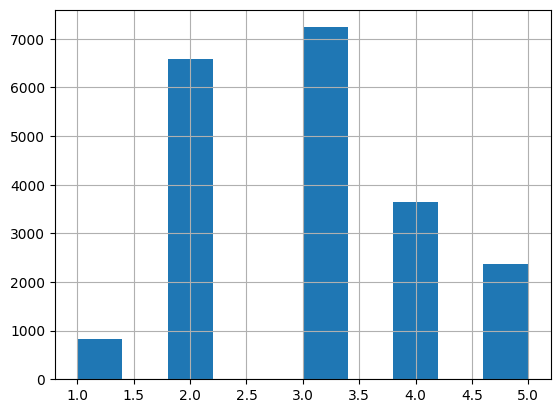

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()

## Stratified Train-Test Split

This code performs a stratified shuffle split on the housing data:

1. **StratifiedShuffleSplit**: Creates a splitter that maintains the proportion of income categories in both train and test sets. The `n_splits=1` means we're doing one split, `test_size=0.2` allocates 20% to testing, and `random_state=42` ensures reproducibility.

2. **Split operation**: The `split()` method uses the `income_cat` column to stratify—ensuring that each income category has roughly the same percentage representation in both train and test sets. This prevents bias where certain income groups might be underrepresented in one set.

3. **Result**: Creates `strat_train_set` (80% of data) and `strat_test_set` (20% of data) with balanced income distributions across both sets.
## Feature Importance Analysis

Before stratifying, it's important to understand which features most influence the target variable (median_house_value). Here are methods to determine feature importance:


1. **Correlation analysis**: Calculate correlation between each feature and the target variable (median_house_value)


2. **Visualization**: Create scatter plots to see visual relationships


3. **Domain knowledge**: Understand the problem context (economically, housing prices are strongly tied to income)
Feature importance from models: Train a model and extract feature importance scores

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [8]:
##drop income_cat attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Visualize the geographic distribution of the data
In this step we will visualize how the income categories are distributed geographically. This will give us a better understanding of how the housing prices are very much related to the location (e.g., close to the ocean) and to the population density. We will do this by creating a scatter plot.

In [9]:
housing = strat_train_set.copy()

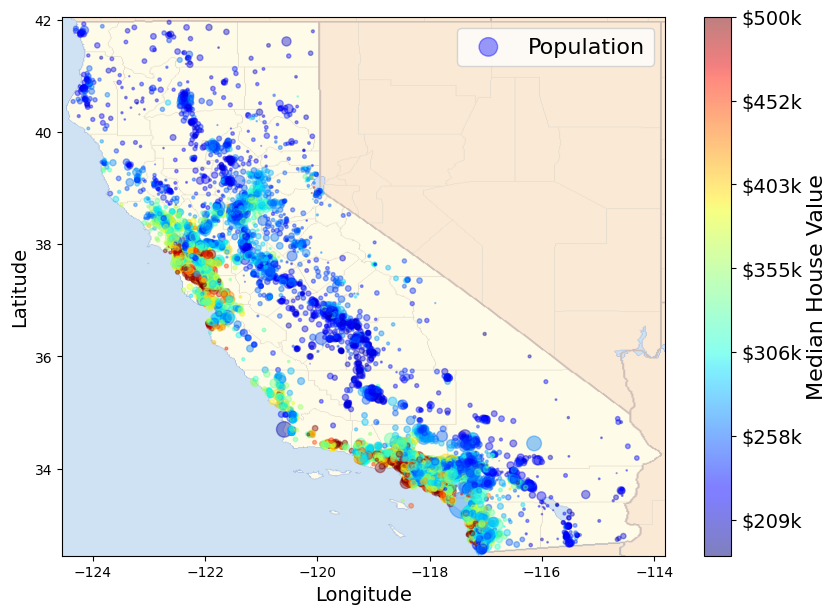

In [10]:
import matplotlib.image as mpimg
california_img=mpimg.imread('../assets/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, # type: ignore
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

## Create a correlation matrix
Now, we will create a correlation matrix to see the correlation coefficients between different variables. The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables.

In [11]:
#Create three new attributes. This is to get a better understanding of the data. Eg how number of rooms per household affects the median house value.
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

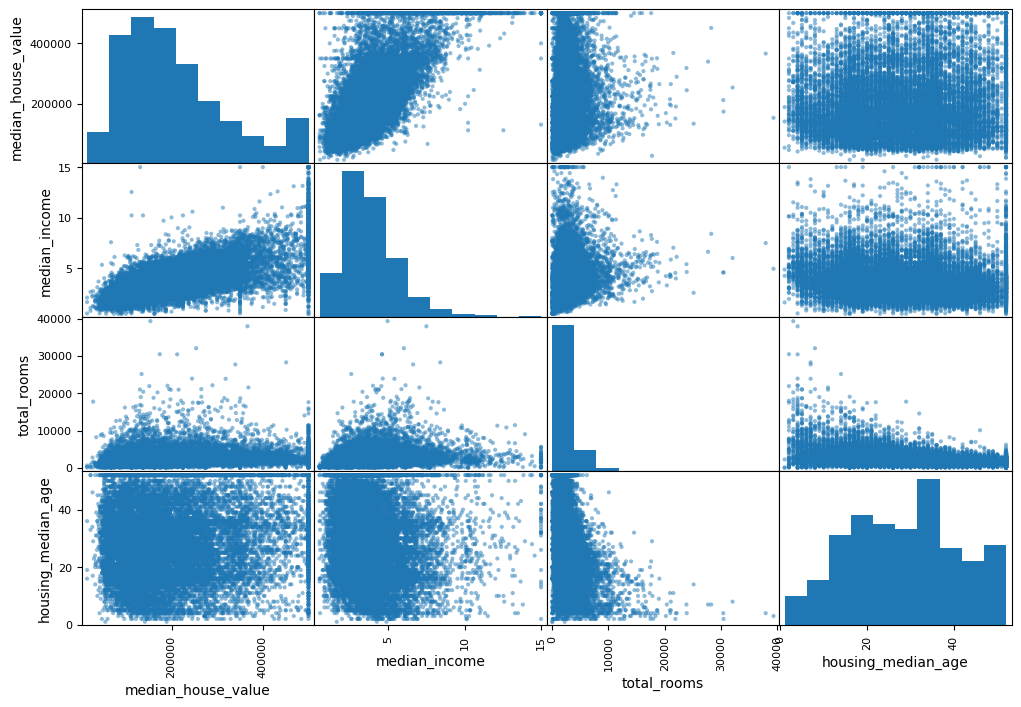

In [12]:
#Analyze correlations. Some columns may not be numerical and hence we use select_dtypes to filter only numerical columns
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


In [13]:
#dropping the target variable from the training set
housing = strat_train_set.drop("median_house_value", axis=1)

In [28]:
housing_labels= strat_train_set["median_house_value"].copy()

## Data Preprocessing: Handling Missing Values

### What is SimpleImputer?

SimpleImputer is a tool that handles **missing values** (NaN, null) in your data by filling them with a strategy you choose. Many machine learning algorithms can't work with missing values, so we need to fill them in before training.

### SimpleImputer Strategies

#### 1. **`strategy="mean"`**
Fills missing values with the **average** of all non-missing values in that column.

Example:
```
Column: [10, 20, NaN, 40]
Mean = (10+20+40)/3 = 23.33
Result: [10, 20, 23.33, 40]
```
Best for: Continuous numeric data (prices, age, temperature)

#### 2. **`strategy="median"`** (Most Common)
Fills missing values with the **middle value** when sorted. This is more robust than mean as it's not affected by outliers.

Example:
```
Column: [10, 20, NaN, 40, 100]
Sorted: [10, 20, 40, 100]
Median = 30 (middle)
Result: [10, 20, 30, 40, 100]
```
Best for: Data with outliers. For house prices, median is preferable because if one expensive house exists, it won't skew the result.

#### 3. **`strategy="most_frequent"`**
Fills missing values with the **most common value** (mode).

Example:
```
Column: [Red, Blue, NaN, Red, Red, Blue]
Most frequent = Red (appears 3 times)
Result: [Red, Blue, Red, Red, Red, Blue]
```
Best for: Categorical data (colors, categories, types)

#### 4. **`strategy="constant"`**
Fills missing values with a **fixed value** you specify.

Best for: When you want to explicitly set a specific value

### Why Use Median for Housing Data?

We use `strategy="median"` because:
- House prices can have extreme outliers (very expensive properties)
- Median is **not affected** by these outliers
- Mean would be skewed too high by expensive houses
- Result: More realistic filled values

**Quick Comparison:**
- Data: `[100k, 200k, 300k, 5000k (outlier)]`
- Mean = 1400k (skewed!)
- Median = 250k (realistic)

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [16]:
#dropping the non-numerical column ocean_proximity
housing_num = housing.drop("ocean_proximity", axis=1)

## `fit()` vs `transform()` - Understanding the Workflow

### **`fit()`** = Learn the pattern
```python
imputer.fit(housing_num)
```
- The imputer **scans all the data** and learns the median value
- Example: "The median house price is $200,000"
- It **memorizes** this value but doesn't change the data yet
- No output—it just learns internally

### **`transform()`** = Apply what was learned
```python
X = imputer.transform(housing_num)
```
- Uses the **learned median** to fill missing values
- Takes the data and **replaces NaN with $200,000**
- Returns the **cleaned dataset**

### Visual Example

**Original Data:**
```
Column: [100k, 200k, NaN, 400k, NaN]
```

**Step 1: `imputer.fit(data)`**
```
imputer learns: median = 250k
(Stored internally, data unchanged)
```

**Step 2: `imputer.transform(data)`**
```
Fills all NaN with 250k
Result: [100k, 200k, 250k, 400k, 250k]
```

### Why Two Separate Steps?

This is **critical** for machine learning to avoid **data leakage**:

- **Learn from training data only**: `imputer.fit(training_data)`
- **Apply to training data**: `X_train = imputer.transform(training_data)`
- **Apply to test data**: `X_test = imputer.transform(test_data)` (using the same learned median)

You want the model to learn patterns only from training data, then apply those same patterns to new test data. If you fit on test data, you're leaking information from the test set into your model, which leads to unrealistic performance estimates.

In [17]:
imputer.fit(housing_num)

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [18]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, # type: ignore
                      index=housing.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [19]:
#Hot Encoding cat columns
housing_cat= housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


## OneHotEncoder: Converting Categorical Data to Numerical

### Why Do We Need OneHotEncoder?

Machine learning algorithms only work with numbers, not text. OneHotEncoder converts **categorical data** (text labels) into **numerical format** that models can understand.

### How OneHotEncoder Works

It creates **binary columns** (0s and 1s) for each unique category.

#### Example:

**Original Data:**
```
ocean_proximity: ["<1H OCEAN", "INLAND", "<1H OCEAN", "NEAR OCEAN"]
```

**After OneHotEncoding:**
```
<1H OCEAN | INLAND | NEAR OCEAN
    1    |    0    |     0
    0    |    1    |     0
    1    |    0    |     0
    0    |    0    |     1
```

Each category gets its own column, and only **one column is 1** (hence "One-Hot"). All others are 0.

---

## Sparse vs Dense Matrix

### **Dense Matrix** (All values stored)
```
<1H OCEAN | INLAND | NEAR OCEAN
    1    |    0    |     0
    0    |    1    |     0
    1    |    0    |     0
    0    |    0    |     1
```
**Uses memory:** Stores all 12 values (including all the 0s)

### **Sparse Matrix** (Only non-zero values stored)
```
Only stores:
Row 0: Column 0 = 1
Row 1: Column 1 = 1
Row 2: Column 0 = 1
Row 3: Column 2 = 1
```
**Uses memory:** Stores only 4 values (the 1s)

### Why Sparse is Better for OneHotEncoding

When you have **many categories** (e.g., 1000 unique values):
- **Dense:** Stores 1000 × number_of_rows values (wasteful!)
- **Sparse:** Stores only the 1s (efficient!)

**Memory saved:** 99% of the matrix is zeros, so sparse saves massive memory.

### In Your Code

```python
# By default, OneHotEncoder returns sparse matrix (memory efficient)
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# Returns sparse matrix (efficient storage)

# To get dense matrix:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# Returns all values including 0s (easier to work with)
```

**For housing data with `ocean_proximity`:**
- Only 5 unique values, so both work fine
- Sparse is slightly more memory-efficient
- Dense is easier to work with and convert to DataFrame

In [20]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
#This returns a sparse matrix where only location with values as 1 is stored.
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0


In [21]:
#convert sparse to dense matrix.
housing_cat_1hot.toarray() # type: ignore

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [22]:
#Creating custom transformer
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
#This transformer adds the three new attributes like rooms per house we created earlier. It also has a parameter to decide whether to add the bedrooms_per_room attribute or not.
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [25]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()
#Now we have to apply all the transformations we have done so far in one go. 
# We can do this using pipelines. This is very useful as it allows us to do all the transformations in one go and also 
# makes it easier to use the same transformations on the test set.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

from sklearn.compose import ColumnTransformer
#Extracting the numerical and categorical columns from the dataset. 
# We will apply the num_pipeline to the numerical columns and OneHotEncoder to the categorical columns.
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
print(housing_num)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  
1265

In [26]:
housing_prepared = full_pipeline.fit_transform(housing)

## Training our model

In [29]:
#Now we have the prepared data and we can train a model on it. We will use a Decision Tree Regressor for this.
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)


,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_l

In [30]:
from sklearn.metrics import mean_squared_error
housing_predictions = tree_reg.predict(housing_prepared)
#Calculating the mean squared error and root mean squared error to evaluate the model performance. 
# We are using the training set here so we expect the error to be very low as the model has seen all the data.
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#The error is zero which means the model has perfectly fit the training data. This is a sign of overfitting. 
#We will see how to evaluate the model on the test set to get a better estimate of the error.

np.float64(0.0)

In [33]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest is an ensemble of Decision Trees. It is a very powerful model and usually gives better results than a single Decision Tree. We will use it to see if we can get better results than the Decision Tree.
forest_reg = RandomForestRegressor(n_estimators=30, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)

In [34]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
#The error is much higher than the Decision Tree but it is still very low. This is a sign of overfitting. 
# We will see how to evaluate the model on the test set to get a better estimate of the error.

np.float64(19675.2882578936)

In [35]:
#Cross Validation
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Cross-Validation: Evaluating Model Generalization

### Big Picture
This code evaluates how well your Decision Tree model generalizes to unseen data using cross-validation, and reports the error as RMSE. Instead of trusting one train–test split, it tests the model 10 times on different data splits.

---

## Understanding Cross-Validation

### What are cross-validation scores?
Cross-validation scores are model performance measurements obtained by repeatedly training and testing the model on different subsets of the data. Each score answers: "How well did the model perform on data it has never seen before?"

### Why cross-validation is important

**❌ Problem with single train–test split:**
- Might be unlucky with your split
- Might overestimate performance
- Might hide overfitting

**✅ Cross-validation advantages:**
- Uses all data for both training and validation
- Gives a distribution of errors
- Reveals stability, variance, and overfitting

### How it works (Visual intuition)

Imagine you have 1000 houses:
1. Split into 10 groups of 100
2. Train on 900, test on 100
3. Rotate the test group each time
4. Collect 10 error values
5. Those 10 errors = cross-validation scores

---
Check this img of how cv works: https://scikit-learn.org/stable/_images/grid_search_cross_validation.png
## The Code Explained

### Import
```python
from sklearn.model_selection import cross_val_score
```
Imports scikit-learn's cross-validation utility.

### Run cross-validation
```python
scores = cross_val_score(
    tree_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)
```

**What happens internally:**
- The dataset is split into 10 folds (cv=10)
- For each fold:
  - Train on 9 folds
  - Validate on 1 fold
- This repeats 10 times, each fold acting as validation once
- You get 10 scores

**Why `neg_mean_squared_error`?**

Scikit-learn has a rule: Higher score = better model. But Mean Squared Error (MSE) is a loss (lower is better). So sklearn returns:
```
score = -MSE
```
This is why the scores are negative—we need to negate them to get positive errors.

### Convert to RMSE
```python
tree_rmse_scores = np.sqrt(-scores)
```

**Step-by-step:**
1. `-scores` → converts back to positive MSE
2. `np.sqrt()` → converts MSE → RMSE

**Why RMSE?**
- Same unit as target variable (house price)
- Easier to interpret
- Penalizes large errors

---

## Interpreting Results

Example output:
```
Scores: [72000, 69000, 71000, ...]
Mean:   70500
Std:    2500
```

This means:
- **Typical prediction error:** ≈ $70,500
- **Model variation:** ±$2,500
- **High std** → unstable model
- **Low std** → consistent model

---

## Why Decision Trees Often Look "Too Good"

Decision Trees can:
- Overfit badly
- Show near-zero error on training data
- Hide this overfitting from a single train–test split

**Cross-validation exposes this overfitting**—this is why it's mandatory, not optional.

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [37]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52270.69001185 49543.98874061 47687.60660323 52480.64648118
 48808.5247543  53388.7193799  53483.75011402 50934.98088564
 49691.51890043 54713.57465342]
Mean: 51300.400052458455
Standard deviation: 2195.017759213773


In [38]:
#Fine tune your model with Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the comput

## Understanding Decision Trees and Random Forests (Beginner Guide)

### What is a Decision Tree?

A **Decision Tree** is like a flowchart that makes predictions by asking a series of yes/no questions about your data.

**Simple Example:**
```
         Is median_income > $5?
                  /  \
               YES    NO
               /        \
        Is latitude    Is latitude
        > 35?          > 33?
        /  \           /  \
      YES  NO        YES  NO
      |     |         |     |
    $400k $350k     $300k $250k
```

Each question splits the data into two groups. At the bottom, it predicts the final price.

**Problem:** A single tree can **overfit** badly (memorize training data instead of learning patterns).

---

### What is a Random Forest?

**Random Forest = Many Decision Trees voting together.**

Instead of trusting one tree, we create many trees, let each one make a prediction, and take the **average** of all predictions.

**Analogy:**
- 1 doctor's opinion → might be wrong
- 10 doctors' opinions (average) → usually correct!

---

## Key Hyperparameters

### 1. `n_estimators` = Number of Trees

**What it means:** How many trees to create in the forest?

```
n_estimators = 3  → Create 3 trees, average their predictions
n_estimators = 10 → Create 10 trees, average their predictions
n_estimators = 30 → Create 30 trees, average their predictions
```

**Trade-off:**
- **More trees** (30, 100) → Better predictions, but slower, uses more memory
- **Fewer trees** (3, 10) → Faster, less memory, but potentially worse predictions

**Rule of thumb:** Start with 10, increase if accuracy is low.

---

### 2. `max_features` = Features Per Decision

**What it means:** When splitting a tree, how many features should we consider?

**Your data has 8 features:**
```
longitude, latitude, housing_median_age, total_rooms, 
population, households, median_income, rooms_per_household
```

**If `max_features = 2`:**
- At each split, randomly choose 2 features to consider
- Example: "Should I split by longitude or population?"
- Ignore the other 6 features for this split

**If `max_features = 4`:**
- At each split, randomly choose 4 features to consider
- More options = potentially better splits

**Trade-off:**
- **More features** (6, 8) → Model has more options, but might overfit
- **Fewer features** (2, 3) → Forces diversity between trees (good!), but might miss patterns

**Rule of thumb:** Try small values like 2-4 first.

---

## How They Work Together

### Example: GridSearchCV Tests All Combinations

You're testing:
```
n_estimators: [3, 10, 30]       (3 options)
max_features: [2, 4, 6, 8]      (4 options)
```

**GridSearchCV will test:**
```
Tree 1:  n_estimators=3,  max_features=2  → Error = 72,000
Tree 2:  n_estimators=3,  max_features=4  → Error = 71,000
Tree 3:  n_estimators=3,  max_features=6  → Error = 70,000
Tree 4:  n_estimators=3,  max_features=8  → Error = 69,000 ✓
Tree 5:  n_estimators=10, max_features=2  → Error = 68,500 ✓✓
Tree 6:  n_estimators=10, max_features=4  → Error = 68,000 ✓✓✓
...
Tree 12: n_estimators=30, max_features=8  → Error = 67,000 ✓✓✓✓
```

**GridSearchCV picks:** The combination with lowest error!

---

## Visual Intuition: Why Diversity Helps

**Bad (all trees similar):**
```
Tree 1: Uses longitude mostly
Tree 2: Uses longitude mostly
Tree 3: Uses longitude mostly
→ All make similar mistakes!
```

**Good (trees diverse):**
```
Tree 1: Uses longitude
Tree 2: Uses population
Tree 3: Uses median_income
→ They catch each other's mistakes!
```

**Low `max_features` forces diversity** by limiting which features each tree can see.

---

## Quick Summary

| Parameter | What It Does | Low Value | High Value |
|-----------|-------------|-----------|-----------|
| `n_estimators` | Number of trees | 3-10 (fast, risky) | 100-1000 (slow, safer) |
| `max_features` | Features per split | 2-3 (diverse trees, safer) | 6-8 (each tree powerful, might overfit) |

**GridSearchCV finds the sweet spot** by testing all combinations and picking the best!

In [39]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [40]:
grid_search.best_estimator_

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",30
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",8
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [41]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52891.66240619666 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [42]:
#Use test set to evaluate the best model
final_model = grid_search.best_estimator_

In [43]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [44]:
X_test_prepared = full_pipeline.transform(X_test)

In [45]:
final_predictions = final_model.predict(X_test_prepared)

In [46]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [47]:
final_rmse

np.float64(47873.26095812988)